In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import acquire
import prepare
import split
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats


alpha = 0.05

In [2]:
"""In a jupyter notebook, classification_exercises.ipynb, use a python 
module (pydata or seaborn datasets) containing datasets as a source 
from the iris data. Create a pandas dataframe, df_iris, from this data."""

df_iris = sns.load_dataset('iris')

# print the first 3 rows
print(df_iris.head(3))

# print the number of rows and columns (shape)
print(f"shape: {df_iris.shape}")

# print the column names
print(df_iris.columns)

# print the data type of each column
print(df_iris.info())

# print the summary statistics for each of the numeric variables
print(df_iris.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
shape: (150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333    

In [3]:
"""Read the Table1_CustDetails table from your spreadsheet exercises 
google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing 
settings."""

sheet_url = 'https://docs.google.com/spreadsheets/d/1luAKJGwksBk-zCOyqBhYRG2gc5J8X-vhAd9Cm2bLbPw/edit#gid=1023018493'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')


df_google_sheets = pd.read_csv(csv_export_url)


# assign the first 100 rows to a new dataframe, df_google_sheets_sample
df_google_sheets_sample = df_google_sheets[0:100]


# print the number of rows of your original dataframe
print(len(df_google_sheets))

# print the first 5 column names
print(df_google_sheets.columns[0:5])

# print the column names that have a data type of object
# instructor answer: df.select_dtypes(include='object').columns.to_list()
print(df_google_sheets.dtypes[df_google_sheets.dtypes == 'object'])
print(df_google_sheets.info())

# compute the range for each of the numeric variables.
df_column_mask = df_google_sheets.apply(pd.api.types.is_float_dtype)
float_columns = df_google_sheets.dtypes[df_column_mask].index.to_list()

print(df_google_sheets[float_columns].apply(lambda x: x.max() - x.min()))

7049
Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')
customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn       

In [4]:
"""Read the data from this google sheet into a dataframe, df_google."""

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')


df_google = pd.read_csv(csv_export_url)

# print the first 3 rows
print(df_google.head(3))

# print the number of rows and columns
print(df_google.shape)

# print the column names
print(df_google.columns)

# print the data type of each column
print(df_google.info())

# print the summary statistics for each of the numeric variables
df_column_mask = df_google.apply(pd.api.types.is_numeric_dtype)
numeric_columns = df_google.dtypes[df_column_mask]

print(df_google[numeric_columns.index].info())

# print the unique values for each of your categorical variables
# categories = df_google.select_dtypes(include=['object', 'int64']).columns.to_list()
categories = ['Survived', 'Pclass', 'Sex', 'Parch', 'Embarked']
print(df_google[categories].apply(lambda x: x.nunique() if x.nunique < 10 else 0))




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------

TypeError: '<' not supported between instances of 'method' and 'int'

In [ ]:
iris_data = acquire.get_iris_data()
iris_data.head()
col_drop = ['species_id', 'measurement_id']
iris_data = iris_data.drop(columns=col_drop)
print(iris_data.head())

iris_data = iris_data.rename(columns={'species_name': 'species'})
print(iris_data.head())

In [ ]:
missing = iris_data.isnull().sum()
(missing[missing] > 0).sum()

dummy_df = pd.get_dummies(iris_data['species'], dummy_na=False, drop_first=True)
print(dummy_df)
iris_data = pd.concat([iris_data, dummy_df], axis=1)
iris_data


In [ ]:
def prep_iris(iris_df):
    col_drop = ['species_id', 'measurement_id']
    iris_data = iris_data.drop(columns=col_drop)
    

    iris_data = iris_data.rename(columns={'species_name': 'species'})
    print(iris_data.head())
    
    dummy_df = pd.get_dummies(iris_data['species'], dummy_na=False, drop_first=True)
    iris_data = pd.concat([iris_data, dummy_df], axis=1)
    
    return iris_data


In [ ]:
titanic_df = acquire.get_titanic_data()

def prep_titanic(titanic_df):
    
    col_drop = ['class', 'deck', 'Unnamed: 0', 'embark_town']
    titanic_df = titanic_df.drop(columns=col_drop)
    print(titanic_df.shape)
    titanic_df = titanic_df.dropna()
    print(titanic_df.shape)
    titanic_dummy = pd.get_dummies(titanic_df[['embarked', 'sex']], dummy_na=False, drop_first=[True, True])
    
    titanic_df = pd.concat([titanic_df, titanic_dummy], axis=1)

    return titanic_df

titanic_df = acquire.get_titanic_data()
titanic_df = prep_titanic(titanic_df)
titanic_df


In [ ]:
telco_df = acquire.get_telco_data()
print(telco_df.columns.to_list())
print(telco_df[['phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection']])
print(telco_df.info())


for c in telco_df.columns:
    print('------------------------')
    print(telco_df[c].value_counts())
    print(telco_df[c].value_counts().sum())
    
blanks = telco_df['total_charges'] != ' '
telco_df = telco_df[blanks]
telco_df.shape

In [ ]:


duplicates = ['contract_type_id', 'payment_type_id', 'internet_service_type_id', 'customer_id']
categorical = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'payment_type', 'contract_type']
lst_true = [True] * len(categorical)
print(lst_true)
telco_df = telco_df.drop(columns=duplicates)
dummies_df = pd.get_dummies(telco_df[categorical], dummy_na=False, drop_first=lst_true)
dummies_df

telco_df = pd.concat([telco_df, dummies_df], axis=1)



   Unnamed: 0  sepal_length  sepal_width  petal_length  petal_width species
0           0           5.1          3.5           1.4          0.2  setosa
1           1           4.9          3.0           1.4          0.2  setosa
2           2           4.7          3.2           1.3          0.2  setosa
3           3           4.6          3.1           1.5          0.2  setosa
4           4           5.0          3.6           1.4          0.2  setosa


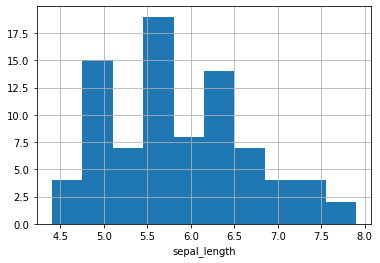

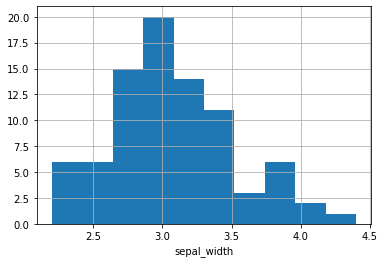

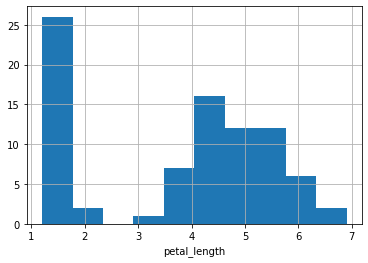

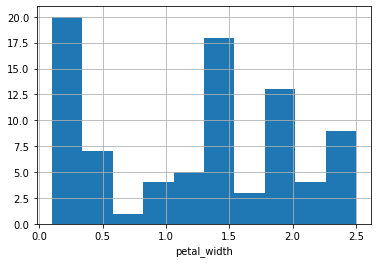

              count      mean       std  min    25%   50%  75%  max
sepal_length   84.0  5.870238  0.769099  4.4  5.375  5.80  6.4  7.9
sepal_width    84.0  3.075000  0.448256  2.2  2.800  3.00  3.4  4.4
petal_length   84.0  3.771429  1.734940  1.2  1.600  4.25  5.1  6.9
petal_width    84.0  1.203571  0.752577  0.1  0.400  1.30  1.8  2.5


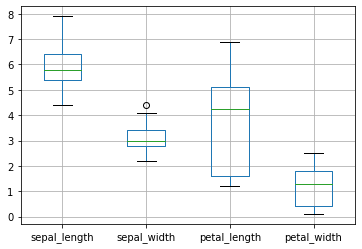

In [155]:
iris_df = acquire.get_iris_data()
iris_df = prepare.prep_iris(iris_df)

train, validate, test = split.train_validate_test_split(iris_df, 'species')

train.head()

quantitative_col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
categorical = ['species']


def quantitative_hist_boxplot_desc(training_df, quantitative_col_names):
    for col in quantitative_col_names:
        train[col].hist()
        plt.xlabel(col)
        plt.show()
    training_df.boxplot(column=quantitative_col_names)
    print(training_df[quantitative_col_names].describe().T)
    plt.show()
    
quantitative_hist_boxplot_desc(train, quantitative_col)




versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64


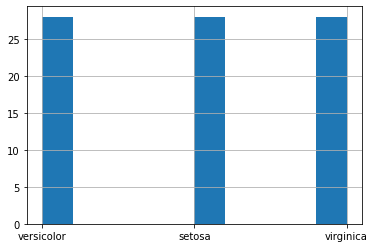

In [157]:
a_species = train.species.unique()
a_species

def target_freq(training_df, target_col):
    training_df[target_col].hist()
    print(training_df[target_col].value_counts())
    plt.show()

target_freq(train, 'species')


In [32]:
# Takeaways: Petal width seems to be distributed 3/4 ways, which could
# line up with our three different species. Same with sepal length.
# Those could be the two drivers that I look at that relates to species.


[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]


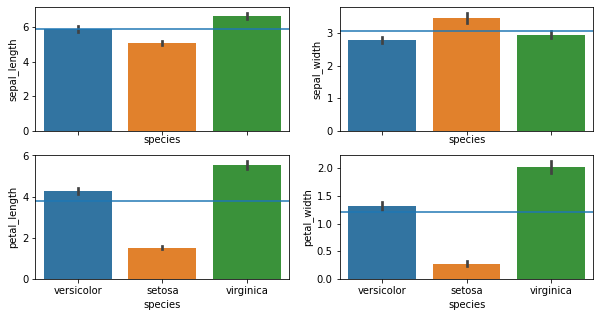

In [159]:
"""Visualize each measurement type (y-axis) with the species variable 
(x-axis) using barplots, adding a horizontal line showing the overall 
mean of the metric (y-axis)."""

def odd(num):
    if num % 2 != 0:
        return True
    else:
        return False
    
def even(num):
    return not odd(num)

def find_subplot_dim(quant_col_lst):
    
    # goal: make x 
    # checks if len is even (making 2 rows)
    if even(len(quant_col_lst)):
        length = len(quant_col_lst)
    else:
        length = len(quant_col_lst) + 1
        
    divided_by_2 = int(length/ 2)
    divided_by_other_factor = int(length / divided_by_2)
    subplot_dim = [divided_by_2, divided_by_other_factor]
    
    return subplot_dim

def quant_vs_target(train_df, target_col, quant_col_lst, mean_line=False):
    
    subplot_dim = find_subplot_dim(quant_col_lst)
    
    plots = []
    fig, axes = plt.subplots(subplot_dim[0], subplot_dim[1], sharex=True, figsize=(10,5))
    
    for axe in axes:
        for ax in axe:
            plots.append(ax)
    print(plots)

    for n in range(len(quant_col_lst)):    
        sns.barplot(ax=plots[n], x=train_df[target_col], y =train_df[quant_col_lst[n]])
        
        if mean_line:
            avg = train_df[quant_col_lst[n]].mean()
            plots[n].axhline(avg,  label=f'Avg {train_df[quant_col_lst[n]]}')
        

quant_vs_target(train, 'species', quantitative_col, mean_line=True)

In [152]:
"""For each measurement type, compute the descriptive statistics for 
each species."""

a_species


def describe_quant_grouped_by_target(training_df, quantitative_col, 
                                     target_col):
    lst_cpy = quantitative_col[:]
    lst_cpy.append(target_col)
    
    print(training_df[lst_cpy].groupby(target_col).describe().T)
    
describe_quant_grouped_by_target(train, quantitative_col, 'species')

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.089286    5.896429   6.625000
             std     0.360390    0.425556   0.532378
             min     4.400000    4.900000   5.800000
             25%     4.875000    5.600000   6.300000
             50%     5.000000    5.800000   6.450000
             75%     5.400000    6.125000   6.900000
             max     5.800000    6.900000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.467857    2.796429   2.960714
             std     0.427788    0.280848   0.318956
             min     2.300000    2.300000   2.200000
             25%     3.275000    2.600000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.800000    3.000000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.507143    4.271429   5.

In [192]:
"""For virginica & versicolor: Compare the mean petal_width using 
the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is
a significant difference between the two groups. Do the same for the
other measurement types."""


def target_subsets(target_col, training_df):
    
    values = training_df[target_col].unique()
    subset_dict= {}
    
    for val in values:
        subset_dict[val] = training_df[training_df[target_col]==val]
        
    return subset_dict

def combinations_of_subsets(target_col, training_df):
    subsets = target_subsets(target_col, training_df)
    combos = list(itertools.combinations(subsets.keys(), 2))
    
    return subsets, combos

def mannshitneyu_for_quant_by_target(target_col, training_df, 
                                    quantitative_col):
    
    predictors = {}
    subsets, combos = combinations_of_subsets(target_col, training_df)
    print(combos)
        

    for i, pair in enumerate(combos):
        
        print(f'{pair[0]}/{pair[1]}:' )
        predictors[str(pair)] = []
        for col in quantitative_col:
            t, p = stats.mannwhitneyu(subsets[pair[0]][col], 
                                      subsets[pair[1]][col])
            print(f'{pair[0]}/{pair[1]} {col}:')
            print(f't: {t}, p: {p}\n')
            
            if p < alpha:
                predictors[str(pair)].append({col: [t, p]})
                
    
                
    return subsets, predictors
            
def print_mannswhitneyu_predictors(predictors):
    for keys, values in predictors.items():
        print(keys)
        for value in values:
            print(value)
        print()
    
subsets, predictors = mannshitneyu_for_quant_by_target('species', train, quantitative_col)
print_mannswhitneyu_predictors(predictors)

    


[('versicolor', 'setosa'), ('versicolor', 'virginica'), ('setosa', 'virginica')]
versicolor/setosa:
versicolor/setosa sepal_length:
t: 728.5, p: 3.38902518496528e-08

versicolor/setosa sepal_width:
t: 67.5, p: 9.838378298699357e-08

versicolor/setosa petal_length:
t: 784.0, p: 1.280026689526043e-10

versicolor/setosa petal_width:
t: 784.0, p: 8.337173413494075e-11

versicolor/virginica:
versicolor/virginica sepal_length:
t: 107.5, p: 3.082029196534108e-06

versicolor/virginica sepal_width:
t: 274.0, p: 0.05257259139845694

versicolor/virginica petal_length:
t: 7.5, p: 2.9479835715150625e-10

versicolor/virginica petal_width:
t: 17.0, p: 6.47119166980993e-10

setosa/virginica:
setosa/virginica sepal_length:
t: 1.0, p: 1.4320631271373019e-10

setosa/virginica sepal_width:
t: 664.5, p: 7.68824715496567e-06

setosa/virginica petal_length:
t: 0.0, p: 1.2763147530342772e-10

setosa/virginica petal_width:
t: 0.0, p: 8.941874653666594e-11

('versicolor', 'setosa')
{'sepal_length': [728.5, 3.38

In [ ]:
# Takeaways: sepal width doesn't seem to be a good predictor in difference
# between virginica and versicolor. petal length and petal width seem to
# have the biggest differences.

# N_0: There is no difference in Petal length/Petal width between virginica/versicolor.
# N_1: There is a significant difference in petal lenght/width between virginica/versicolor





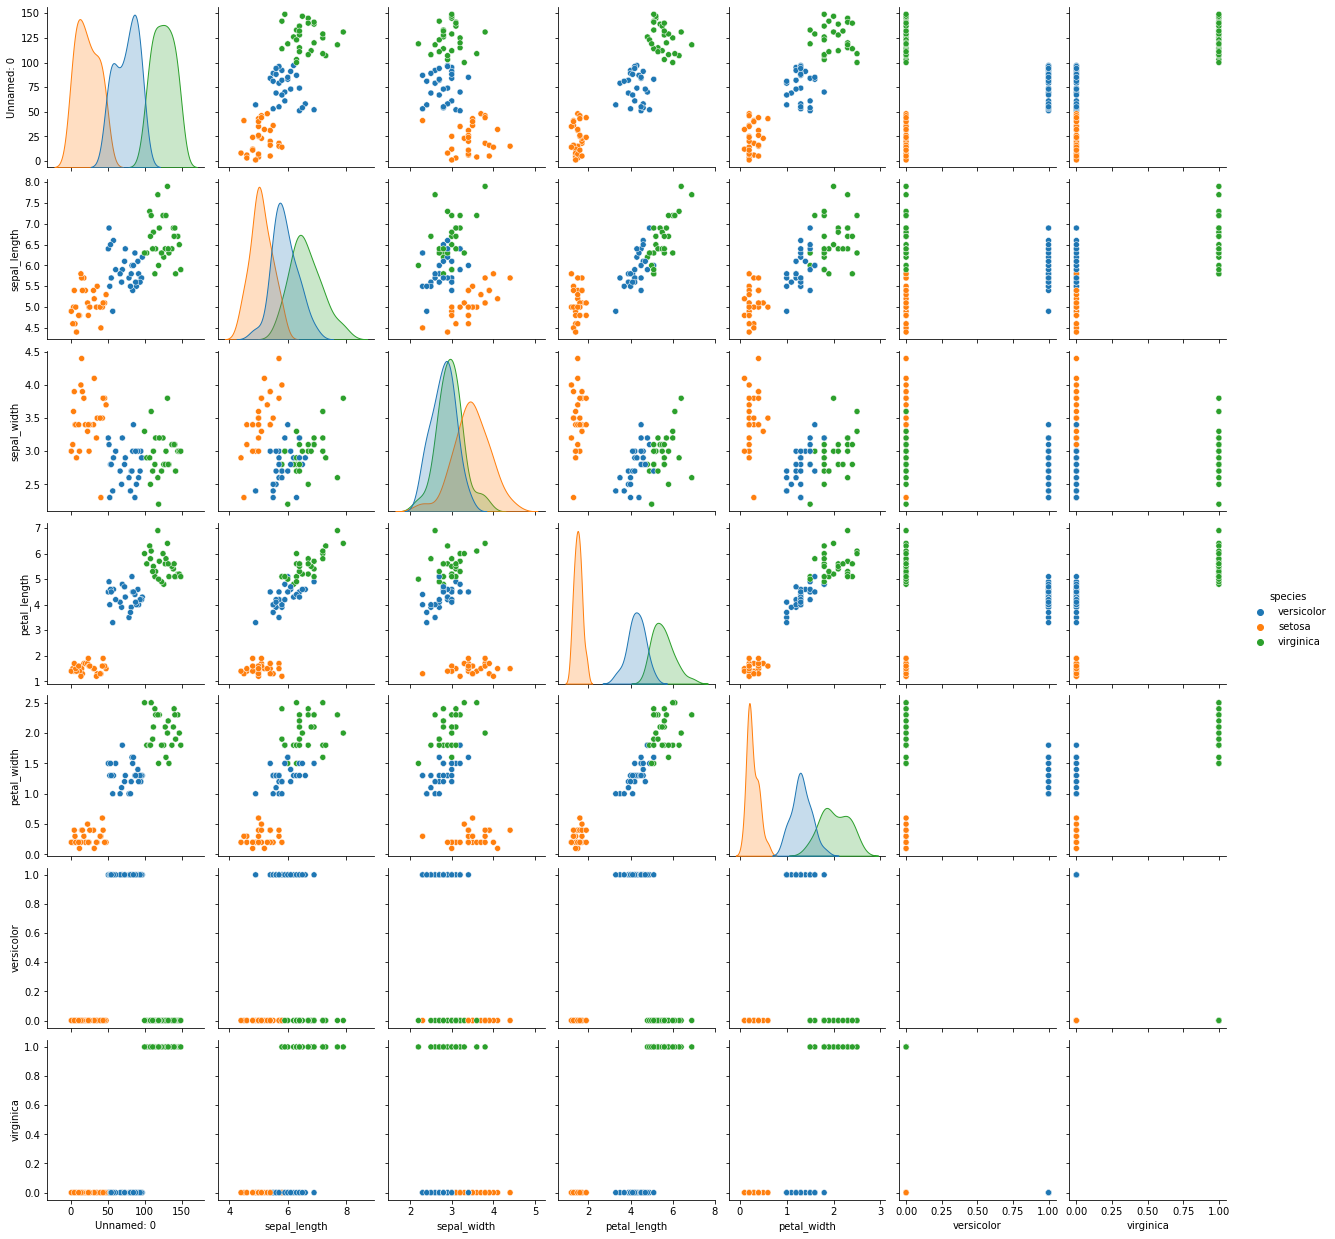

In [74]:
"""Visualize the interaction of each measurement type with the others 
using a pairplot (or scatter matrix or something similar) and add 
color to represent species.
"""

sns.pairplot(train, hue='species')

[('sepal_length', 'petal_length'), ('sepal_length', 'petal_width'), ('petal_length', 'petal_width')]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


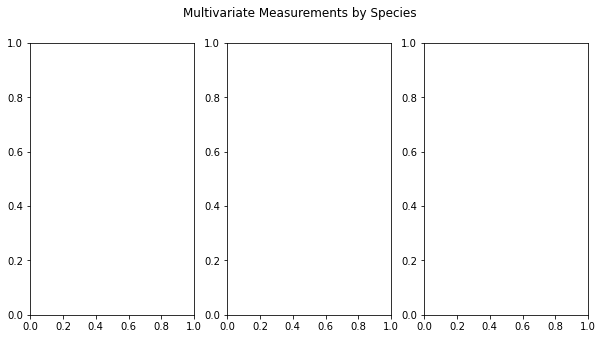

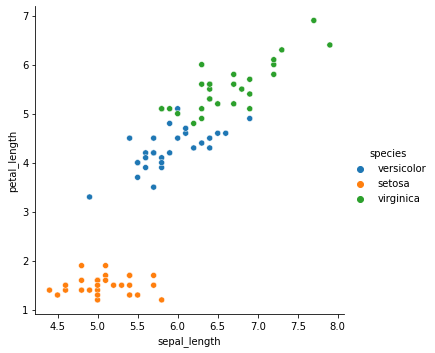

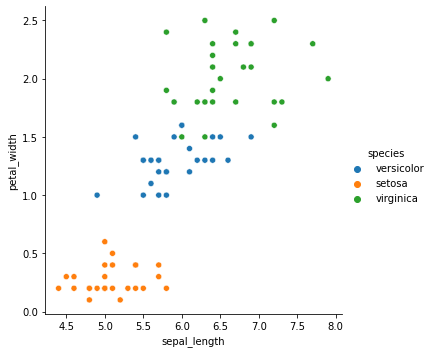

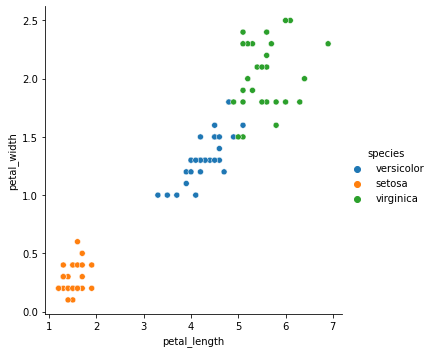

In [140]:
"""Visualize two numeric variables by means of the species. 
Hint: sns.relplot with hue or col
"""

predictor_combs= list(itertools.combinations(list(predictors.keys()), 2))
print(predictor_combs)

fig, axes = plt.subplots(1,3, figsize=(10,5))
print(axes)
fig.suptitle('Multivariate Measurements by Species')


plots = [axes[0], axes[1], axes[2]]

for i, pair in enumerate(predictor_combs):
    sns.relplot(x=train[pair[0]], y=train[pair[1]],hue=train.species, 
                ax=plots[i])
    plt.show()




In [ ]:
class TrainingData:
    
    def __init__(self, quant_list, training_df)